# Exploratory Analisys

## Import libraries

In [2]:
import pandas as pd
import numpy as np

## Import Databases

book_rating.csv from Kaggle

In [3]:
book_rating = pd.read_csv("../data/books_rating.csv") 
print(book_rating.head())

           Id                           Title  Price         User_id  \
0  1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1  0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2  0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3  0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4  0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   

                          profileName review/helpfulness  review/score  \
0               Jim of Oz "jim-of-oz"                7/7           4.0   
1                       Kevin Killian              10/10           5.0   
2                        John Granger              10/11           5.0   
3  Roy E. Perry "amateur philosopher"                7/7           4.0   
4     D. H. Richards "ninthwavestore"                3/3           4.0   

   review/time                                   review/summary  \
0    940636800           Nice collection of Julie Strai

In [4]:
print(book_rating.columns)
print(book_rating.dtypes)
print(book_rating["review/summary"].head())
print(book_rating["review/score"].head())

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')
Id                     object
Title                  object
Price                 float64
User_id                object
profileName            object
review/helpfulness     object
review/score          float64
review/time             int64
review/summary         object
review/text            object
dtype: object
0             Nice collection of Julie Strain images
1                                  Really Enjoyed It
2    Essential for every personal and Public Library
3    Phlip Nel gives silly Seuss a serious treatment
4                             Good academic overview
Name: review/summary, dtype: object
0    4.0
1    5.0
2    5.0
3    4.0
4    4.0
Name: review/score, dtype: float64


Merge dataset by review/text and review/score

In [5]:
merged_df = book_rating[["review/summary", "review/score"]].dropna()
merged_df.head()

,review/summary,review/score
0,Nice collection of Julie Strain images,4.0
1,Really Enjoyed It,5.0
2,Essential for every personal and Public Library,5.0
3,Phlip Nel gives silly Seuss a serious treatment,4.0
4,Good academic overview,4.0


In [12]:
print(merged_df.shape)
print(merged_df.nunique())
print(merged_df['review/score'].value_counts())

(2999593, 2)
review/summary    1592314
review/score            5
dtype: int64
review/score
5.0    1807099
4.0     585546
3.0     254265
1.0     201650
2.0     151033
Name: count, dtype: int64


In [9]:
merged_df.to_csv("../data/merged_reviews.csv", index=False)

## Gráfico con todos los scores

C:\Users\Mirty\AppData\Local\Temp\ipykernel_7684\2556872973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="review/score", palette="Blues", order=sorted(merged_df["review/score"].unique()))


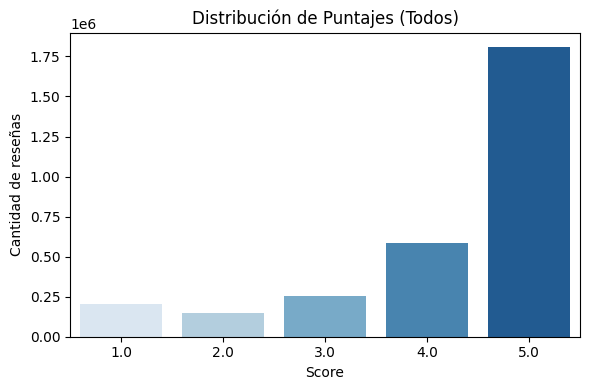

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico con todos los puntajes
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x="review/score", palette="Blues", order=sorted(merged_df["review/score"].unique()))
plt.title("Distribución de Puntajes (Todos)")
plt.xlabel("Score")
plt.ylabel("Cantidad de reseñas")
plt.tight_layout()
plt.show()
